<a href="https://colab.research.google.com/github/TeoGM97/Clasificacion_Multiple/blob/master/clasificacion_multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

In [ ]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 0s 0us/step


Igual que en la clasificacion binaria, tenemos varios numeros que representan palabras

In [ ]:
word_index = reuters.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])
for _ in train_data[0]: #Tiene un valor de 38 posibhles salidas
  print(word_index.get (_ -3))

550378/550378 [==============================] - 0s 0us/step
None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


Lo que tenemos en train_data no es de tipo tensor. (8982,), por lo que usaremos el codigo de vectorizar.

In [ ]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences]=1
  return results

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

Train labels es un numero escalar en cada uno de los ejemplos. Debemos hacer one hoding coding con 46 posibles salidas

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Ahora vamos a crear nuestra red, ya que los elementos ahora si son tensores.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) #Softmax porque es clasificacion multiple

Ahora vamos a compilar el modelo

In [ ]:
from tensorflow.python import metrics
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

Vamos a separar el set de validacion

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Entrenamiento

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size = 512,
          validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 6s 30ms/step - loss: 2.4854 - accuracy: 0.5003 - val_loss: 1.6668 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.3793 - accuracy: 0.7076 - val_loss: 1.2885 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0324 - accuracy: 0.7767 - val_loss: 1.1199 - val_accuracy: 0.7730
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8096 - accuracy: 0.8312 - val_loss: 1.0482 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6455 - accuracy: 0.8644 - val_loss: 0.9899 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5180 - accuracy: 0.8901 - val_loss: 0.9225 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4186 - accuracy: 0.9133 - val_loss: 0.9121 - val_accuracy: 0.8200
Epoch 8/9
16/16 [===

Visualizacion

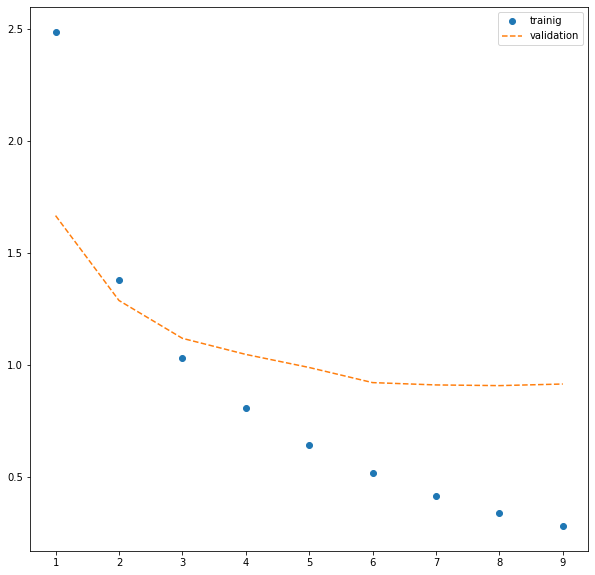

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'trainig')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

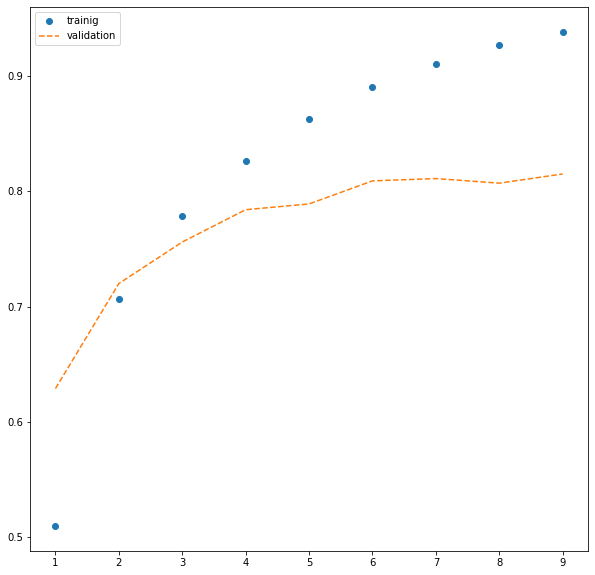

In [ ]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'trainig')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9815 - accuracy: 0.7939


[0.98154616355896, 0.7938557267189026]

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [ ]:
predictions[0]

array([4.8762915e-05, 4.7996597e-04, 1.8178933e-05, 7.4469185e-01,
       2.3960750e-01, 1.2299390e-05, 2.3513085e-05, 1.0777781e-05,
       1.3784474e-03, 1.5803344e-04, 1.6646527e-04, 1.5610870e-03,
       4.4810608e-05, 2.7160044e-05, 1.6725287e-05, 3.4973371e-05,
       1.3446955e-03, 2.0339868e-03, 2.0587479e-04, 1.4708600e-03,
       3.5332653e-03, 1.9306112e-04, 8.5521940e-05, 7.2637828e-05,
       8.4011363e-06, 1.7388662e-05, 1.6157564e-05, 1.8070253e-04,
       8.2507329e-05, 5.7124729e-05, 7.9425343e-05, 4.9239996e-05,
       1.6210333e-05, 5.7495014e-05, 7.7003118e-05, 2.2573529e-05,
       1.2715200e-04, 4.1879584e-06, 1.9890933e-04, 7.6570222e-04,
       6.6350540e-06, 7.9629349e-04, 3.7047353e-06, 2.0667681e-04,
       5.3732106e-06, 6.7622716e-07], dtype=float32)

In [ ]:
np.sum(predictions[0])

1.0

In [ ]:
np.argmax(predictions[0]) #Posicion en la que la prediccion es mas alta

3

El modelo tiene el problema del overfiting. Se usaran las tecnicas vistas anteriormente para mejorar esto:

# Modelo mas simple

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(56, activation='relu', input_shape = (10000,)))
model2.add(layers.Dense(56, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size = 512,
          validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 25ms/step - loss: 2.7162 - accuracy: 0.5174 - val_loss: 1.8072 - val_accuracy: 0.6240
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.4613 - accuracy: 0.7033 - val_loss: 1.3572 - val_accuracy: 0.7070
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0859 - accuracy: 0.7701 - val_loss: 1.1698 - val_accuracy: 0.7350
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8610 - accuracy: 0.8128 - val_loss: 1.0585 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.7015 - accuracy: 0.8550 - val_loss: 0.9894 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5674 - accuracy: 0.8815 - val_loss: 0.9561 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 0s 19ms/step - loss: 0.4632 - accuracy: 0.9014 - val_loss: 0.9134 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

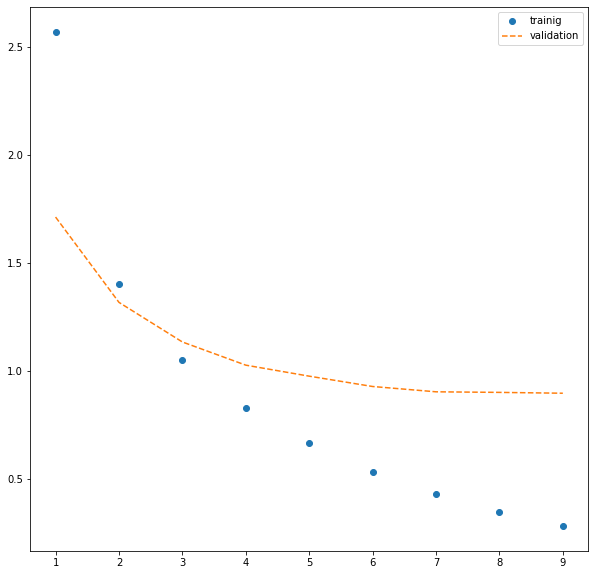

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_2 = history2.history['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'trainig')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

In [ ]:
model2.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.9859 - accuracy: 0.7841


[0.9859153032302856, 0.784060537815094]

En este caso, podemos ver que con un modelo mas sencillo, el accuracy empeora

# Regularizacion

In [ ]:
from keras import regularizers

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape = (10000,),
                        kernel_regularizer = regularizers.l2(0.001)))
model3.add(layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size = 512,
          validation_data = (x_val, y_val))

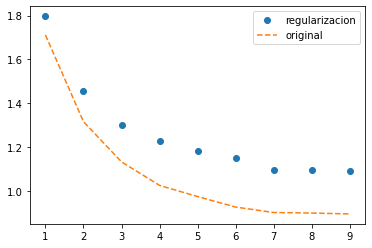

In [ ]:
history_dictr = history.history
loss_values = history_dictr['loss']
val_loss_values = history_dictr['val_loss']
val_loss_values_3 = history3.history['val_loss']

epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, val_loss_values_3, 'o', label = 'regularizacion')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

In [ ]:
model3.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1715 - accuracy: 0.7796


[1.1714715957641602, 0.7796081900596619]

# Dropout

In [ ]:
from keras.backend import dropout

model4 = models.Sequential()
model4.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model4.add(layers.Dropout(0.75))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dropout(0.25))
model4.add(layers.Dense(46, activation='softmax'))

model4.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size = 512,
          validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 30ms/step - loss: 3.1756 - accuracy: 0.3211 - val_loss: 2.2552 - val_accuracy: 0.5360
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 2.1879 - accuracy: 0.4991 - val_loss: 1.7213 - val_accuracy: 0.6110
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.8327 - accuracy: 0.5522 - val_loss: 1.5295 - val_accuracy: 0.6540
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 1.6466 - accuracy: 0.6015 - val_loss: 1.4116 - val_accuracy: 0.6750
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 1.5585 - accuracy: 0.6178 - val_loss: 1.3558 - val_accuracy: 0.6880
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 1.4769 - accuracy: 0.6438 - val_loss: 1.2892 - val_accuracy: 0.7020
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 1.3881 - accuracy: 0.6548 - val_loss: 1.2486 - val_accuracy: 0.7100
Epoch 8/9
16/16 [===

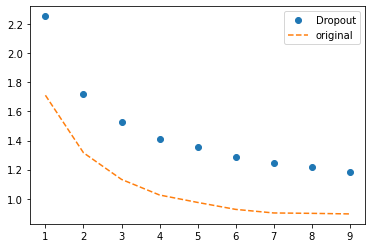

In [ ]:
history_dictr = history.history
loss_values = history_dictr['loss']
val_loss_values = history_dictr['val_loss']
val_loss_values_4 = history4.history['val_loss']

epoch = range(1,len(loss_values) + 1)
plt.plot(epoch, val_loss_values_4, 'o', label = 'Dropout')
plt.plot(epoch, val_loss_values, '--', label = 'original')
plt.legend()
plt.show()

In [ ]:
model4.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.2488 - accuracy: 0.7124


[1.2487763166427612, 0.7123775482177734]